<a href="https://colab.research.google.com/github/Donatas-L/deep-learning/blob/master/MNIST-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing required packages
!pip install tensorflow
!pip install matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Defining functions
def normalize(images):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images

def set_shape(images, shape):
  return images.reshape(images.shape[0], shape[0], shape[1], shape[2])

def show_images_with_labels(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
      image = images[i]
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(image)
      plt.xlabel(labels[i])
  plt.show()

In [4]:
# Loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Input shape 28x28 pixels grid & greyscale value for each pixel in the grid
input_shape = (28, 28, 1)

# Formatted data for Neural Net
train_images = normalize(set_shape(train_images, input_shape))
test_images = normalize(set_shape(test_images, input_shape))

Number of training examples: 60000
Number of test examples: 10000


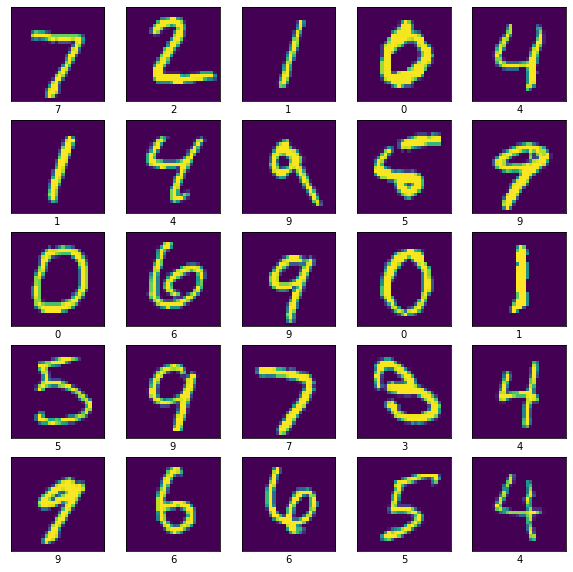

In [5]:
print(f"Number of training examples: {len(train_images)}")
print(f"Number of test examples: {len(test_images)}")

show_images_with_labels(list(map(lambda i : i.numpy().reshape(28,28), test_images)), test_labels)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu, input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [7]:
epochs = 10
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2643 - accuracy: 0.9159 - val_loss: 0.0632 - val_accuracy: 0.9818
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0989 - accuracy: 0.9697 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0753 - accuracy: 0.9774 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.0397 - val_accuracy: 0.9879
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0353 - val_accuracy: 0.9897
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0342 - val_accuracy: 0.9898
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0324 - val_accuracy:

In [8]:
loss, accuracy  = model.evaluate(test_images, test_labels, verbose=False)

print(f'Test Loss = {loss}')
print(f'Test Accuracy = {accuracy}')

Test Loss = 0.02296615205705166
Test Accuracy = 0.9927999973297119


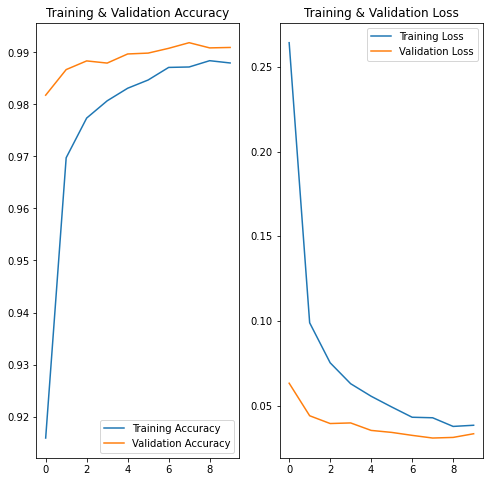

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

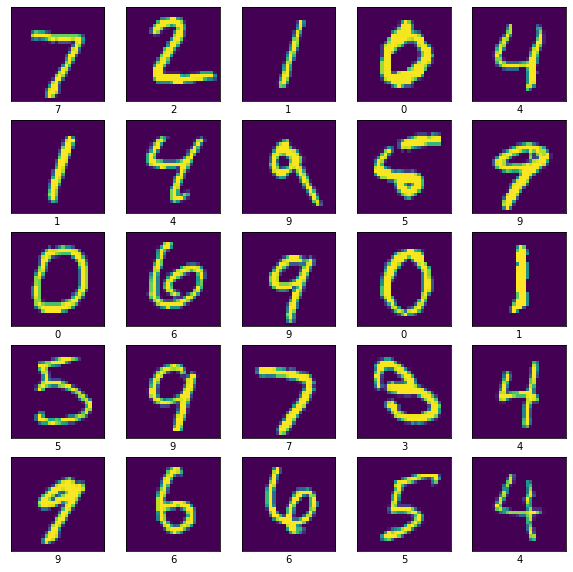

In [10]:
predictions = list(map(lambda i: np.argmax(i), model.predict(test_images)))
show_images_with_labels(list(map(lambda i : i.numpy().reshape(28,28), test_images)), predictions)